In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# covid = pd.read_csv("C:/Users/elzbi/OneDrive/Pulpit/jdszr15-materialy-python/Projekt 2/covid_positive")
covid = pd.read_csv("covid_positive")
df = pd.DataFrame(covid)
covid.head()

,COVID_TEST_RESULT,MEDICAL_UNIT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,PNEUMONIA,DEAD,AGE,SEX,PREGNANT,SMOKER,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE
0,1,1,0,NaN,NaN,1.0,1,65,female,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,1,1.0,0.0,0.0,1,55,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,0,NaN,NaN,0.0,1,68,male,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1,1,1,0.0,0.0,1.0,0,40,female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,NaN,NaN,0.0,0,64,female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
covid.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113288 entries, 0 to 113287
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COVID_TEST_RESULT       113288 non-null  int64  
 1   MEDICAL_UNIT            113288 non-null  int64  
 2   HOSPITALIZED            113288 non-null  int64  
 3   INTUBED                 75002 non-null   float64
 4   ADMITTED_TO_ICU         74994 non-null   float64
 5   PNEUMONIA               113284 non-null  float64
 6   DEAD                    113288 non-null  int64  
 7   AGE                     113288 non-null  int64  
 8   SEX                     113288 non-null  object 
 9   PREGNANT                46901 non-null   float64
 10  SMOKER                  112098 non-null  float64
 11  COPD                    112218 non-null  float64
 12  ASTHMA                  112222 non-null  float64
 13  IMMUNOSUPPRESSED        112083 non-null  float64
 14  CARDIOVASCULAR_DISEA

In [4]:
#function creating a values for age group
def grouping_age(row) -> str:
    if row['AGE'] < 18:
        val = '-18'
    elif row['AGE'] < 30:
        val = '18-30'
    elif row['AGE'] < 44:
        val = '30-44'
    elif row['AGE'] < 60:
        val = '45-60'
    else:
        val = '60+'
    return val

In [5]:
#create column "AGE_GROUP"
covid["AGE_GROUP"] = covid.apply(grouping_age, axis=1)
#move column "AGE_GROUP" next to "AGE" column
column_to_move = covid.pop('AGE_GROUP')
covid.insert(7, "AGE_GROUP", column_to_move)
covid

,COVID_TEST_RESULT,MEDICAL_UNIT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,PNEUMONIA,DEAD,AGE_GROUP,AGE,SEX,...,SMOKER,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE
0,1,1,0,NaN,NaN,1.0,1,60+,65,female,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,1,1.0,0.0,0.0,1,45-60,55,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,0,NaN,NaN,0.0,1,60+,68,male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1,1,1,0.0,0.0,1.0,0,30-44,40,female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,NaN,NaN,0.0,0,60+,64,female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113283,1,13,0,NaN,NaN,0.0,0,60+,67,female,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
113284,1,13,1,0.0,0.0,0.0,0,60+,77,female,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
113285,1,13,0,NaN,NaN,0.0,0,60+,70,male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
113286,1,13,0,NaN,NaN,0.0,0,30-44,32,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
all_30_44 = covid[covid['AGE_GROUP'] == '30-44']
all_45_60 = covid[covid['AGE_GROUP'] == '45-60']
all_over_60 = covid[covid['AGE_GROUP'] == '60+']

In [7]:
def tetrachoric_corr(df, feature):
    # Utworzenie tablicy korelacyjnej (ang. contingency table):
    contingency_table = pd.crosstab(df['DEAD'], df[feature])

    # wyciągnicie wartości z tablicy korelacyjnej:
    a = contingency_table.iloc[0,0]
    b = contingency_table.iloc[0,1]
    c = contingency_table.iloc[1,0]
    d = contingency_table.iloc[1,1]

    # obliczenie wsółczynnika:
    tet_corr = math.cos(math.pi / (1 + math.sqrt(a*d /b/c)))
    # print(contingency_table)
    return round(tet_corr,2)

In [8]:
age_groups = ['30-44', '45-60', '60+']
result_df = pd.DataFrame(columns=["Comorbidity"] + age_groups)

In [9]:
features = ['OBESITY','DIABETES','HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']
for feature in features:
    row = [feature]
    for age_group in age_groups:
        if age_group == '30-44':
            df = all_30_44
        elif age_group == '45-60':
            df = all_45_60
        else:
            df = all_over_60
        tet_corr = tetrachoric_corr(df, feature)
        row.append(tet_corr)
    result_df.loc[len(result_df)] = row

In [10]:
print(result_df)

              Comorbidity  30-44  45-60   60+
0                 OBESITY  -0.02  -0.12 -0.13
1                DIABETES   0.03   0.02 -0.01
2            HYPERTENSION  -0.08  -0.06 -0.04
3  CARDIOVASCULAR_DISEASE  -0.36  -0.35 -0.22
4  CHRONIC_KIDNEY_DISEASE   0.10   0.03 -0.07
5        IMMUNOSUPPRESSED  -0.17  -0.28 -0.22
6                    COPD  -0.29  -0.25 -0.19
7                  ASTHMA  -0.52  -0.49 -0.40
8                  SMOKER  -0.37  -0.31 -0.19
9           OTHER_DISEASE  -0.27  -0.24 -0.13


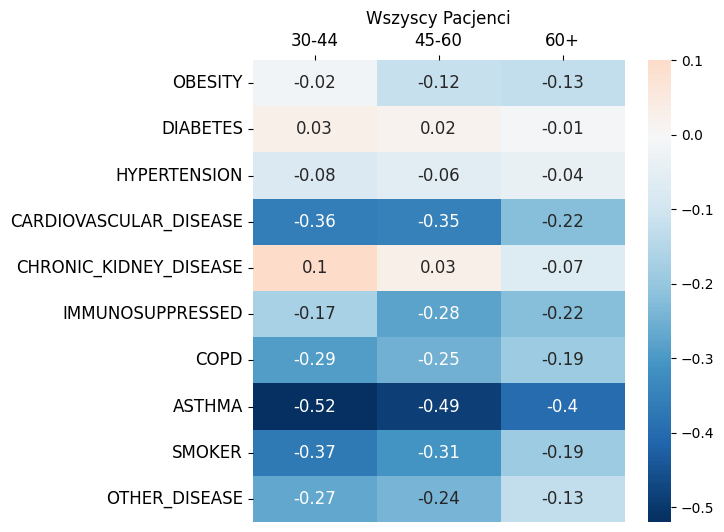

In [11]:
plt.figure(figsize=(6, 6))
ax = sns.heatmap(result_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(age_groups, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Wszyscy Pacjenci')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [12]:
male_30_44 = all_30_44[all_30_44['SEX'] == 'male']
male_45_60 = all_45_60[all_45_60['SEX'] == 'male']
male_over_60 = all_over_60[all_over_60['SEX'] == 'male']

female_30_44 = all_30_44[all_30_44['SEX'] == 'female']
female_45_60 = all_45_60[all_45_60['SEX'] == 'female']
female_over_60 = all_over_60[all_over_60['SEX'] == 'female']

In [13]:
age_groups = ['30-44', '45-60', '60+']
men_result_df = pd.DataFrame(columns=["Comorbidity"] + age_groups)

In [14]:
features = ['OBESITY','DIABETES','HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']
for feature in features:
    row = [feature]
    for age_group in age_groups:
        if age_group == '30-44':
            df = male_30_44
        elif age_group == '45-60':
            df = male_45_60
        else:
            df = male_over_60
        tet_corr = tetrachoric_corr(df, feature)
        row.append(tet_corr)
    men_result_df.loc[len(men_result_df)] = row

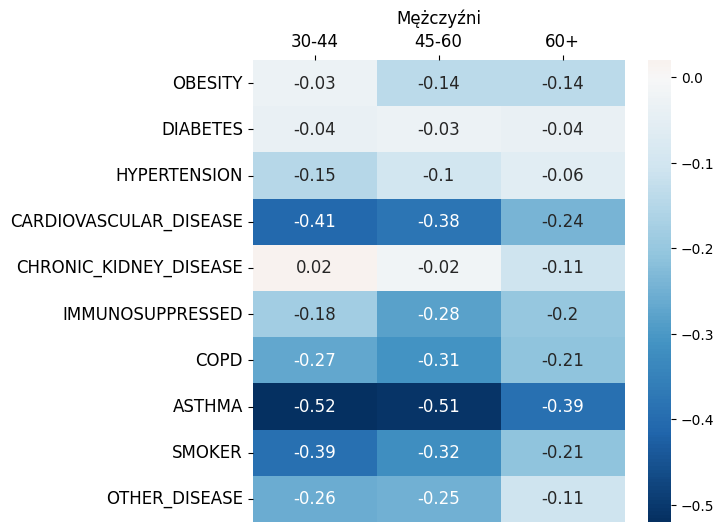

In [15]:
plt.figure(figsize=(6, 6))
ax = sns.heatmap(men_result_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(age_groups, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Mężczyźni')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [16]:
age_groups = ['30-44', '45-60', '60+']
women_result_df = pd.DataFrame(columns=["Comorbidity"] + age_groups)

In [17]:
features = ['OBESITY','DIABETES','HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']
for feature in features:
    row = [feature]
    for age_group in age_groups:
        if age_group == '30-44':
            df = female_30_44
        elif age_group == '45-60':
            df = female_45_60
        else:
            df = female_over_60
        tet_corr = tetrachoric_corr(df, feature)
        row.append(tet_corr)
    women_result_df.loc[len(women_result_df)] = row

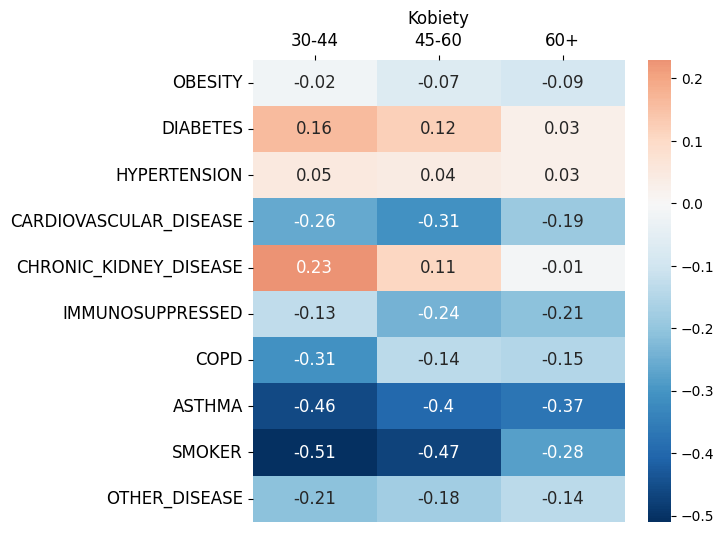

In [18]:
plt.figure(figsize=(6, 6))
ax = sns.heatmap(women_result_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(age_groups, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Kobiety')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [19]:
pneumonia_30_44 = all_30_44[all_30_44['PNEUMONIA'] == 1]
pneumonia_45_60 = all_45_60[all_45_60['PNEUMONIA'] == 1]
pneumonia_over_60 = all_over_60[all_over_60['PNEUMONIA'] == 1]

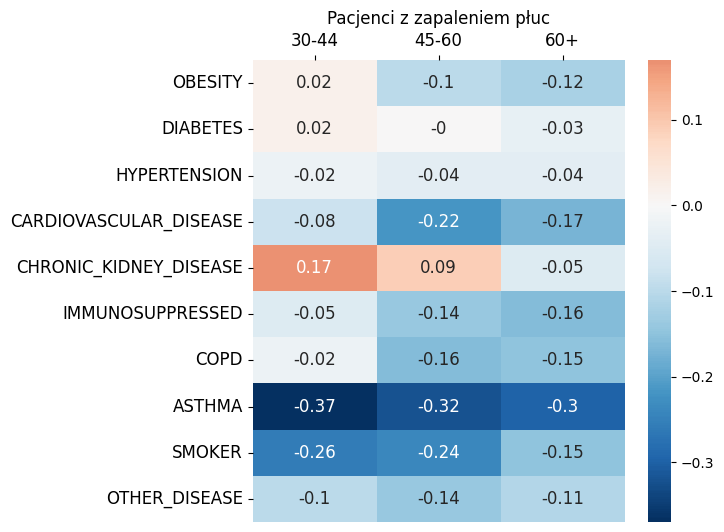

In [20]:
age_groups = ['30-44', '45-60', '60+']
pneumonia_result_df = pd.DataFrame(columns=["Comorbidity"] + age_groups)

features = ['OBESITY','DIABETES','HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']
for feature in features:
    row = [feature]
    for age_group in age_groups:
        if age_group == '30-44':
            df = pneumonia_30_44
        elif age_group == '45-60':
            df = pneumonia_45_60
        else:
            df = pneumonia_over_60
        tet_corr = tetrachoric_corr(df, feature)
        row.append(tet_corr)
    pneumonia_result_df.loc[len(pneumonia_result_df)] = row

plt.figure(figsize=(6, 6))
ax = sns.heatmap(pneumonia_result_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(age_groups, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Pacjenci z zapaleniem płuc')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [21]:
med_units_covid = covid.groupby("MEDICAL_UNIT").sum()

In [22]:
med_units_covid[f'DEAD_Percentage'] = ((med_units_covid['DEAD']/med_units_covid['HOSPITALIZED'])*100).round(2)

In [23]:
cols = list(med_units_covid.columns)
# Determine the position where you want to insert the new column
insert_position = 6  # Insert the column at index 3 (4th column)

# Insert the new column at the desired position
med_units_covid = pd.concat([
    med_units_covid.iloc[:, :insert_position],
    med_units_covid['DEAD_Percentage'],
    med_units_covid.iloc[:, insert_position:]
], axis=1)
med_units_covid

,COVID_TEST_RESULT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,PNEUMONIA,DEAD,DEAD_Percentage,AGE_GROUP,AGE,SEX,...,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE,DEAD_Percentage
MEDICAL_UNIT,,,,,,,,,,,,,,,,,,,,,
1,38,10,2.0,3.0,7.0,3,30.00,60+45-6060+30-4460+60+30-4418-3030-4418-3030-4...,1668,femalemalemalefemalefemalefemalefemalefemalefe...,...,0.0,1.0,1.0,2.0,5.0,2.0,7.0,2.0,1.0,30.00
2,12,5,0.0,0.0,2.0,0,0.00,45-6045-60-1818-3030-44-18-18-18-18-18-1845-60,271,malefemalemalefemalefemalemalefemalemalefemale...,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.00
3,4339,2267,540.0,289.0,2307.0,1157,51.04,45-6030-4460+45-6060+60+60+60+30-4460+60+60+45...,223800,malemalemalefemalemalemalemalemalemalefemalema...,...,100.0,226.0,106.0,210.0,1564.0,212.0,1319.0,1224.0,148.0,51.04
4,44332,34119,12701.0,1156.0,22379.0,26974,79.06,45-6060+45-6060+45-6060+30-4460+45-6060+60+60+...,2560710,malemalemalemalemalemalemalemalemalemalemalema...,...,2567.0,2122.0,1927.0,2899.0,19683.0,3693.0,16111.0,11810.0,4630.0,79.06
5,1858,896,64.0,27.0,633.0,416,46.43,45-6045-6060+60+60+45-6060+45-6030-4460+60+60+...,94217,femalemalefemalemalemalemalefemalemalemalemale...,...,101.0,104.0,36.0,61.0,510.0,40.0,502.0,533.0,127.0,46.43
6,10003,6795,1406.0,1108.0,6108.0,4006,58.96,60+30-4445-6060+45-6060+45-6060+45-6045-6045-6...,566370,femalemalemalefemalefemalemalemalemalefemalema...,...,439.0,480.0,310.0,701.0,4098.0,636.0,3523.0,2674.0,334.0,58.96
7,364,166,13.0,18.0,108.0,26,15.66,45-6045-6045-6060+60+60+30-4430-4460+45-6045-6...,17948,malemalemalefemalemalefemalemalemalemalemalema...,...,16.0,17.0,6.0,16.0,100.0,14.0,74.0,84.0,3.0,15.66
8,3313,1987,289.0,366.0,2050.0,945,47.56,60+60+60+60+60+60+60+60+60+60+30-4460+60+60+60...,182311,malemalemalefemalemalemalemalefemalemalefemale...,...,61.0,131.0,64.0,156.0,1312.0,132.0,1161.0,1762.0,93.0,47.56
9,5531,2916,646.0,991.0,2707.0,875,30.01,60+60+30-4445-6030-4460+45-6060+45-6045-6045-6...,292333,femalemalemalemalemalemalemalemalefemalemalefe...,...,199.0,266.0,182.0,349.0,1834.0,240.0,1509.0,1301.0,203.0,30.01


In [24]:
MED_UNIT_9 = covid[covid['MEDICAL_UNIT'] == 9]
MED_UNIT_9

,COVID_TEST_RESULT,MEDICAL_UNIT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,PNEUMONIA,DEAD,AGE_GROUP,AGE,SEX,...,SMOKER,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE
64259,1,9,1,1.0,1.0,1.0,1,60+,61,female,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
64260,1,9,1,1.0,1.0,1.0,1,60+,71,male,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
64261,1,9,1,1.0,1.0,1.0,1,30-44,42,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
64262,1,9,1,1.0,1.0,1.0,1,45-60,44,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64263,1,9,0,NaN,NaN,1.0,1,30-44,37,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69785,1,9,1,0.0,1.0,1.0,0,60+,60,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69786,1,9,1,0.0,0.0,0.0,0,18-30,29,female,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
69787,1,9,1,1.0,1.0,0.0,0,45-60,56,male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
69788,1,9,1,0.0,0.0,1.0,0,60+,61,female,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [25]:
MED_UNIT_9.groupby(["AGE_GROUP"]).sum()

,COVID_TEST_RESULT,MEDICAL_UNIT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,PNEUMONIA,DEAD,AGE,SEX,PREGNANT,SMOKER,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE
AGE_GROUP,,,,,,,,,,,,,,,,,,,,
-18,138,1242,43,5.0,11.0,30.0,2,1199,malefemalemalefemalemalefemalemalemalemalefema...,0.0,3.0,2.0,8.0,2.0,4.0,3.0,0.0,6.0,12.0,10.0
18-30,461,4149,127,12.0,24.0,130.0,9,11445,malemalemalemalemalemalefemalefemalemalemalefe...,16.0,95.0,3.0,49.0,15.0,11.0,28.0,10.0,20.0,95.0,20.0
30-44,1129,10161,471,76.0,135.0,483.0,61,41715,malemalemalemalemalefemalemalemalemalemalemale...,34.0,169.0,15.0,84.0,35.0,31.0,180.0,24.0,178.0,331.0,31.0
45-60,1707,15363,917,211.0,338.0,871.0,256,88069,malemalefemalemalefemalemalemalemalefemalefema...,4.0,202.0,29.0,74.0,51.0,68.0,563.0,54.0,533.0,467.0,47.0
60+,2096,18864,1358,342.0,483.0,1193.0,547,149905,femalemalemalemalefemalemalefemalemalefemalema...,0.0,195.0,150.0,51.0,79.0,235.0,1060.0,152.0,772.0,396.0,95.0


In [26]:
MED_UNIT_9_30_44 = MED_UNIT_9[MED_UNIT_9['AGE_GROUP'] == '30-44']
MED_UNIT_9_45_60 = MED_UNIT_9[MED_UNIT_9['AGE_GROUP'] == '45-60']
MED_UNIT_9_over_60 = MED_UNIT_9[MED_UNIT_9['AGE_GROUP'] == '60+']

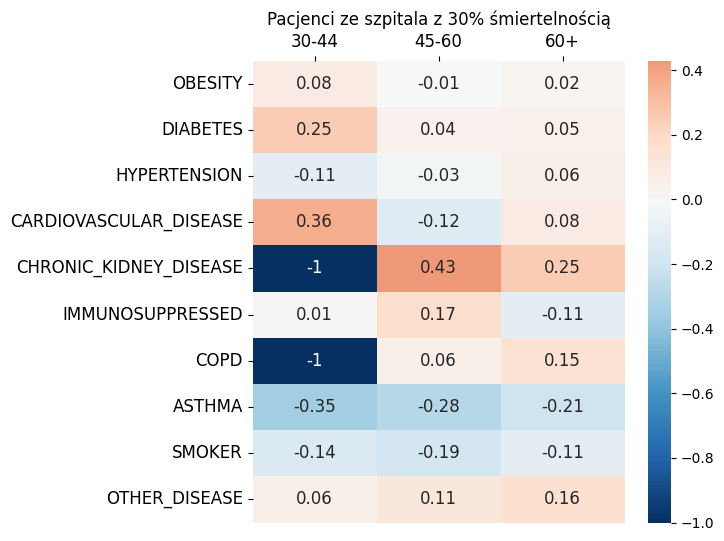

In [27]:
age_groups = ['30-44', '45-60', '60+']
MED_UNIT_9_result_df = pd.DataFrame(columns=["Comorbidity"] + age_groups)

features = ['OBESITY','DIABETES','HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']
for feature in features:
    row = [feature]
    for age_group in age_groups:
        if age_group == '30-44':
            df = MED_UNIT_9_30_44
        elif age_group == '45-60':
            df = MED_UNIT_9_45_60
        else:
            df = MED_UNIT_9_over_60
        tet_corr = tetrachoric_corr(df, feature)
        row.append(tet_corr)
    MED_UNIT_9_result_df.loc[len(MED_UNIT_9_result_df)] = row

plt.figure(figsize=(6, 6))
ax = sns.heatmap(MED_UNIT_9_result_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(age_groups, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Pacjenci ze szpitala z 30% śmiertelnością')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [28]:
MED_UNIT_9 = MED_UNIT_9[MED_UNIT_9['AGE'] >= 30]

C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\3634100790.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MED_UNIT_9_df = pd.concat([MED_UNIT_9_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])


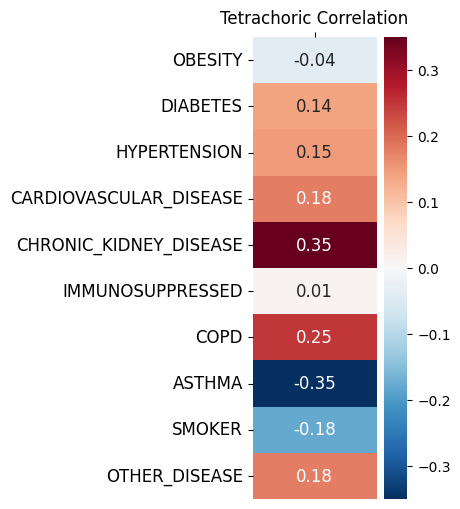

In [29]:
features = ['OBESITY', 'DIABETES', 'HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']

# Create the result DataFrame
MED_UNIT_9_df = pd.DataFrame(columns=['Comorbidity', 'Tetrachoric Correlation'])

# Calculate the tetrachoric correlations and populate the DataFrame
for feature in features:
    tet_corr = tetrachoric_corr(MED_UNIT_9, feature)
    MED_UNIT_9_df = pd.concat([MED_UNIT_9_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])

# Create the heatmap
plt.figure(figsize=(2, 6))
ax = sns.heatmap(MED_UNIT_9_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [30]:
MED_UNIT_4 = covid[covid['MEDICAL_UNIT'] == 4]
MED_UNIT_4 = MED_UNIT_4[MED_UNIT_4['AGE'] >= 30]

C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\2807702879.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MED_UNIT_4_df = pd.concat([MED_UNIT_4_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])


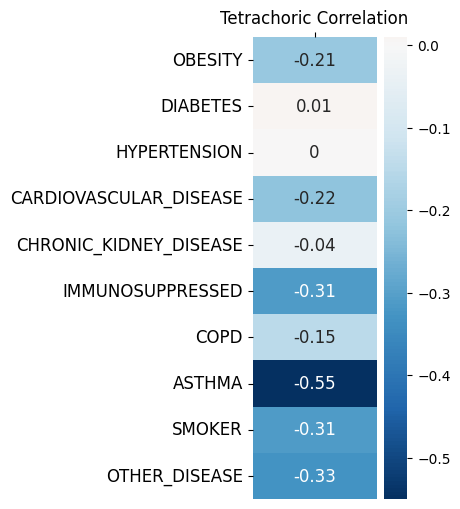

In [31]:
features = ['OBESITY', 'DIABETES', 'HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']

# Create the result DataFrame
MED_UNIT_4_df = pd.DataFrame(columns=['Comorbidity', 'Tetrachoric Correlation'])

# Calculate the tetrachoric correlations and populate the DataFrame
for feature in features:
    tet_corr = tetrachoric_corr(MED_UNIT_4, feature)
    MED_UNIT_4_df = pd.concat([MED_UNIT_4_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])

# Create the heatmap
plt.figure(figsize=(2, 6))
ax = sns.heatmap(MED_UNIT_4_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [32]:
MED_UNIT_6 = covid[covid['MEDICAL_UNIT'] == 6]
MED_UNIT_6 = MED_UNIT_6[MED_UNIT_6['AGE'] >= 30]

C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\1275892031.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MED_UNIT_6_df = pd.concat([MED_UNIT_6_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])


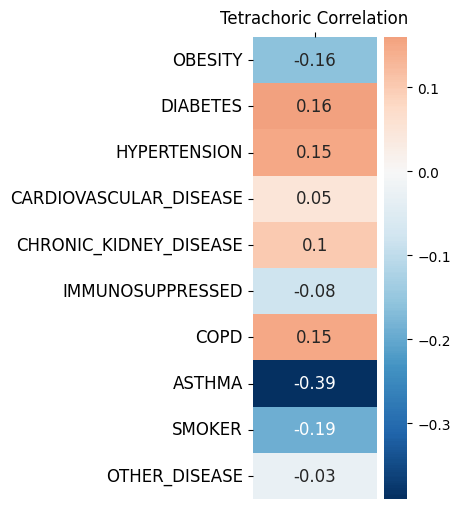

In [33]:
features = ['OBESITY', 'DIABETES', 'HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']

# Create the result DataFrame
MED_UNIT_6_df = pd.DataFrame(columns=['Comorbidity', 'Tetrachoric Correlation'])

# Calculate the tetrachoric correlations and populate the DataFrame
for feature in features:
    tet_corr = tetrachoric_corr(MED_UNIT_6, feature)
    MED_UNIT_6_df = pd.concat([MED_UNIT_6_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])

# Create the heatmap
plt.figure(figsize=(2, 6))
ax = sns.heatmap(MED_UNIT_6_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [34]:
all_30_44['OBESITY_DIABETES'] = (all_30_44['OBESITY'] == 1) & (all_30_44['DIABETES'] == 1)
all_30_44['OBESITY_DIABETES'] = all_30_44['OBESITY_DIABETES'].astype(int)

all_30_44['OBESITY_HYPERTENSION'] = (all_30_44['OBESITY'] == 1) & (all_30_44['HYPERTENSION'] == 1)
all_30_44['OBESITY_HYPERTENSION'] = all_30_44['OBESITY_HYPERTENSION'].astype(int)

all_30_44['DIABETES_HYPERTENSION'] = (all_30_44['DIABETES'] == 1) & (all_30_44['HYPERTENSION'] == 1)
all_30_44['DIABETES_HYPERTENSION'] = all_30_44['DIABETES_HYPERTENSION'].astype(int)

all_30_44['OBESITY_DIABETES_HYPERTENSION'] = (all_30_44['OBESITY'] == 1) & (all_30_44['HYPERTENSION'] == 1) & (all_30_44['DIABETES'] == 1)
all_30_44['OBESITY_DIABETES_HYPERTENSION'] = all_30_44['OBESITY_DIABETES_HYPERTENSION'].astype(int)

all_30_44['CKD_DIABETES'] = (all_30_44['CHRONIC_KIDNEY_DISEASE'] == 1) & (all_30_44['DIABETES'] == 1)
all_30_44['CKD_DIABETES'] = all_30_44['CKD_DIABETES'].astype(int)

all_30_44['CKD_HYPERTENSION'] = (all_30_44['CHRONIC_KIDNEY_DISEASE'] == 1) & (all_30_44['HYPERTENSION'] == 1)
all_30_44['CKD_HYPERTENSION'] = all_30_44['CKD_HYPERTENSION'].astype(int)

all_30_44['CKD_DIABETES_HYPERTENSION'] = (all_30_44['CHRONIC_KIDNEY_DISEASE'] == 1) & (all_30_44['DIABETES'] == 1) & (all_30_44['HYPERTENSION'] == 1)
all_30_44['CKD_DIABETES_HYPERTENSION'] = all_30_44['CKD_DIABETES_HYPERTENSION'].astype(int)

all_30_44

C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\1220701595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_30_44['OBESITY_DIABETES'] = (all_30_44['OBESITY'] == 1) & (all_30_44['DIABETES'] == 1)
C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\1220701595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_30_44['OBESITY_DIABETES'] = all_30_44['OBESITY_DIABETES'].astype(int)
C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\1220701595.py:4: SettingWithCopyWarning: 
A value is trying to be set o

,COVID_TEST_RESULT,MEDICAL_UNIT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,PNEUMONIA,DEAD,AGE_GROUP,AGE,SEX,...,DIABETES,OBESITY,OTHER_DISEASE,OBESITY_DIABETES,OBESITY_HYPERTENSION,DIABETES_HYPERTENSION,OBESITY_DIABETES_HYPERTENSION,CKD_DIABETES,CKD_HYPERTENSION,CKD_DIABETES_HYPERTENSION
3,1,1,1,0.0,0.0,1.0,0,30-44,40,female,...,0.0,0.0,0.0,0,0,0,0,0,0,0
6,1,1,1,0.0,0.0,0.0,0,30-44,37,female,...,1.0,1.0,0.0,1,1,1,1,0,0,0
8,1,1,0,NaN,NaN,0.0,0,30-44,38,female,...,0.0,0.0,0.0,0,0,0,0,0,0,0
10,1,1,1,0.0,0.0,0.0,0,30-44,30,male,...,0.0,0.0,0.0,0,0,0,0,0,0,0
18,1,1,0,NaN,NaN,0.0,0,30-44,30,male,...,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113268,1,13,0,NaN,NaN,0.0,0,30-44,36,female,...,0.0,0.0,0.0,0,0,0,0,0,0,0
113270,1,13,0,NaN,NaN,0.0,0,30-44,37,male,...,0.0,0.0,0.0,0,0,0,0,0,0,0
113271,1,13,0,NaN,NaN,0.0,0,30-44,36,female,...,0.0,0.0,0.0,0,0,0,0,0,0,0
113286,1,13,0,NaN,NaN,0.0,0,30-44,32,male,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [35]:
all_45_60['OBESITY_DIABETES'] = (all_45_60['OBESITY'] == 1) & (all_45_60['DIABETES'] == 1)
all_45_60['OBESITY_DIABETES'] = all_45_60['OBESITY_DIABETES'].astype(int)

all_45_60['OBESITY_HYPERTENSION'] = (all_45_60['OBESITY'] == 1) & (all_45_60['HYPERTENSION'] == 1)
all_45_60['OBESITY_HYPERTENSION'] = all_45_60['OBESITY_HYPERTENSION'].astype(int)

all_45_60['DIABETES_HYPERTENSION'] = (all_45_60['DIABETES'] == 1) & (all_45_60['HYPERTENSION'] == 1)
all_45_60['DIABETES_HYPERTENSION'] = all_45_60['DIABETES_HYPERTENSION'].astype(int)

all_45_60['OBESITY_DIABETES_HYPERTENSION'] = (all_45_60['OBESITY'] == 1) & (all_45_60['HYPERTENSION'] == 1) & (all_45_60['DIABETES'] == 1)
all_45_60['OBESITY_DIABETES_HYPERTENSION'] = all_45_60['OBESITY_DIABETES_HYPERTENSION'].astype(int)

all_45_60['CKD_DIABETES'] = (all_45_60['CHRONIC_KIDNEY_DISEASE'] == 1) & (all_45_60['DIABETES'] == 1)
all_45_60['CKD_DIABETES'] = all_45_60['CKD_DIABETES'].astype(int)

all_45_60['CKD_HYPERTENSION'] = (all_45_60['CHRONIC_KIDNEY_DISEASE'] == 1) & (all_45_60['HYPERTENSION'] == 1)
all_45_60['CKD_HYPERTENSION'] = all_45_60['CKD_HYPERTENSION'].astype(int)

all_45_60['CKD_DIABETES_HYPERTENSION'] = (all_45_60['CHRONIC_KIDNEY_DISEASE'] == 1) & (all_45_60['DIABETES'] == 1) & (all_45_60['HYPERTENSION'] == 1)
all_45_60['CKD_DIABETES_HYPERTENSION'] = all_45_60['CKD_DIABETES_HYPERTENSION'].astype(int)

all_45_60

C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\491334717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_45_60['OBESITY_DIABETES'] = (all_45_60['OBESITY'] == 1) & (all_45_60['DIABETES'] == 1)
C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\491334717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_45_60['OBESITY_DIABETES'] = all_45_60['OBESITY_DIABETES'].astype(int)
C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\491334717.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

,COVID_TEST_RESULT,MEDICAL_UNIT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,PNEUMONIA,DEAD,AGE_GROUP,AGE,SEX,...,DIABETES,OBESITY,OTHER_DISEASE,OBESITY_DIABETES,OBESITY_HYPERTENSION,DIABETES_HYPERTENSION,OBESITY_DIABETES_HYPERTENSION,CKD_DIABETES,CKD_HYPERTENSION,CKD_DIABETES_HYPERTENSION
1,1,1,1,1.0,0.0,0.0,1,45-60,55,male,...,1.0,0.0,0.0,0,0,0,0,0,0,0
11,1,1,0,NaN,NaN,0.0,0,45-60,55,male,...,0.0,0.0,0.0,0,0,0,0,0,0,0
12,1,1,0,NaN,NaN,0.0,0,45-60,48,female,...,1.0,0.0,0.0,0,0,0,0,0,0,0
16,1,1,0,NaN,NaN,0.0,0,45-60,54,male,...,0.0,0.0,0.0,0,0,0,0,0,0,0
17,1,1,1,0.0,1.0,1.0,0,45-60,59,male,...,1.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113264,1,13,1,0.0,0.0,0.0,0,45-60,53,female,...,1.0,0.0,0.0,0,0,1,0,0,0,0
113269,1,13,1,0.0,0.0,0.0,0,45-60,54,male,...,1.0,0.0,0.0,0,0,0,0,0,0,0
113273,1,13,0,NaN,NaN,0.0,0,45-60,56,female,...,0.0,0.0,0.0,0,0,0,0,0,0,0
113277,1,13,0,NaN,NaN,0.0,0,45-60,52,female,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [36]:
all_over_60['OBESITY_DIABETES'] = (all_over_60['OBESITY'] == 1) & (all_over_60['DIABETES'] == 1)
all_over_60['OBESITY_DIABETES'] = all_over_60['OBESITY_DIABETES'].astype(int)

all_over_60['OBESITY_HYPERTENSION'] = (all_over_60['OBESITY'] == 1) & (all_over_60['HYPERTENSION'] == 1)
all_over_60['OBESITY_HYPERTENSION'] = all_over_60['OBESITY_HYPERTENSION'].astype(int)

all_over_60['DIABETES_HYPERTENSION'] = (all_over_60['DIABETES'] == 1) & (all_over_60['HYPERTENSION'] == 1)
all_over_60['DIABETES_HYPERTENSION'] = all_over_60['DIABETES_HYPERTENSION'].astype(int)

all_over_60['OBESITY_DIABETES_HYPERTENSION'] = (all_over_60['OBESITY'] == 1) & (all_over_60['HYPERTENSION'] == 1) & (all_over_60['DIABETES'] == 1)
all_over_60['OBESITY_DIABETES_HYPERTENSION'] = all_over_60['OBESITY_DIABETES_HYPERTENSION'].astype(int)

all_over_60['CKD_DIABETES'] = (all_over_60['CHRONIC_KIDNEY_DISEASE'] == 1) & (all_over_60['DIABETES'] == 1)
all_over_60['CKD_DIABETES'] = all_over_60['CKD_DIABETES'].astype(int)

all_over_60['CKD_HYPERTENSION'] = (all_over_60['CHRONIC_KIDNEY_DISEASE'] == 1) & (all_over_60['HYPERTENSION'] == 1)
all_over_60['CKD_HYPERTENSION'] = all_over_60['CKD_HYPERTENSION'].astype(int)

all_over_60['CKD_DIABETES_HYPERTENSION'] = (all_over_60['CHRONIC_KIDNEY_DISEASE'] == 1) & (all_over_60['DIABETES'] == 1) & (all_over_60['HYPERTENSION'] == 1)
all_over_60['CKD_DIABETES_HYPERTENSION'] = all_over_60['CKD_DIABETES_HYPERTENSION'].astype(int)

all_over_60

C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\103950920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_over_60['OBESITY_DIABETES'] = (all_over_60['OBESITY'] == 1) & (all_over_60['DIABETES'] == 1)
C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\103950920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_over_60['OBESITY_DIABETES'] = all_over_60['OBESITY_DIABETES'].astype(int)
C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\103950920.py:4: SettingWithCopyWarning: 
A value is trying to b

,COVID_TEST_RESULT,MEDICAL_UNIT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,PNEUMONIA,DEAD,AGE_GROUP,AGE,SEX,...,DIABETES,OBESITY,OTHER_DISEASE,OBESITY_DIABETES,OBESITY_HYPERTENSION,DIABETES_HYPERTENSION,OBESITY_DIABETES_HYPERTENSION,CKD_DIABETES,CKD_HYPERTENSION,CKD_DIABETES_HYPERTENSION
0,1,1,0,NaN,NaN,1.0,1,60+,65,female,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,1,1,0,NaN,NaN,0.0,1,60+,68,male,...,1.0,0.0,0.0,0,0,1,0,0,0,0
4,1,1,0,NaN,NaN,0.0,0,60+,64,female,...,0.0,0.0,0.0,0,0,0,0,0,0,0
5,1,1,0,NaN,NaN,1.0,0,60+,64,female,...,1.0,0.0,0.0,0,0,1,0,1,1,1
14,1,1,1,0.0,1.0,1.0,0,60+,80,female,...,0.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113279,1,13,0,NaN,NaN,0.0,0,60+,76,male,...,0.0,0.0,0.0,0,0,0,0,0,0,0
113281,1,13,1,0.0,0.0,0.0,0,60+,72,male,...,1.0,1.0,0.0,1,0,0,0,0,0,0
113283,1,13,0,NaN,NaN,0.0,0,60+,67,female,...,0.0,0.0,0.0,0,0,0,0,0,0,0
113284,1,13,1,0.0,0.0,0.0,0,60+,77,female,...,1.0,0.0,0.0,0,0,1,0,0,0,0


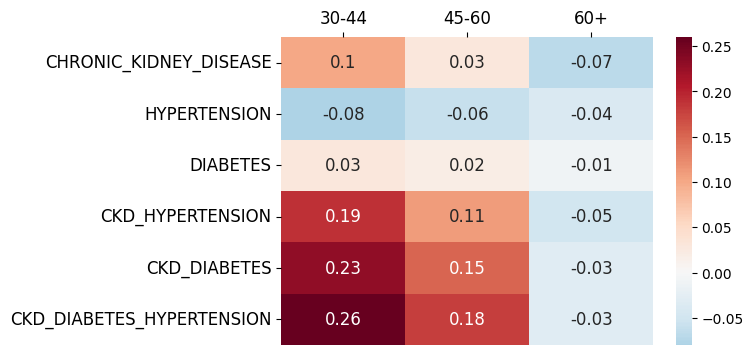

In [49]:
age_groups = ['30-44', '45-60', '60+']
result_combined_df = pd.DataFrame(columns=["Comorbidity"] + age_groups)

features = ['CHRONIC_KIDNEY_DISEASE', 'HYPERTENSION', 'DIABETES' , 'CKD_HYPERTENSION', 'CKD_DIABETES', 'CKD_DIABETES_HYPERTENSION']
for feature in features:
    row = [feature]
    for age_group in age_groups:
        if age_group == '30-44':
            df = all_30_44
        elif age_group == '45-60':
            df = all_45_60
        else:
            df = all_over_60
        tet_corr = tetrachoric_corr(df, feature)
        row.append(tet_corr)
    result_combined_df.loc[len(result_combined_df)] = row

plt.figure(figsize=(6, 4))
ax = sns.heatmap(result_combined_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(age_groups, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [50]:
pneumonia_30_44 = all_30_44[all_30_44['PNEUMONIA'] == 1]
pneumonia_45_60 = all_45_60[all_45_60['PNEUMONIA'] == 1]
pneumonia_over_60 = all_over_60[all_over_60['PNEUMONIA'] == 1]

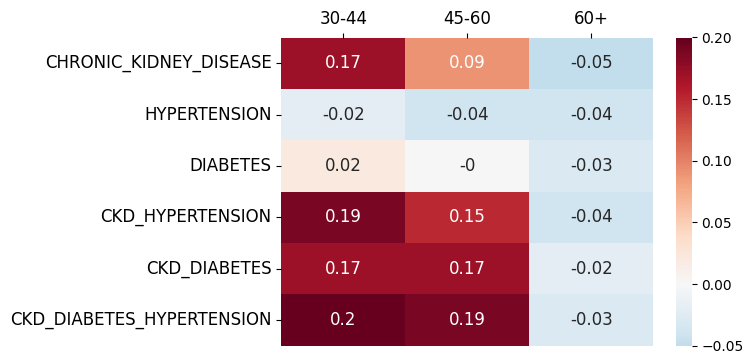

In [52]:
age_groups = ['30-44', '45-60', '60+']
pneumonia_combined_df = pd.DataFrame(columns=["Comorbidity"] + age_groups)

features = ['CHRONIC_KIDNEY_DISEASE', 'HYPERTENSION', 'DIABETES' , 'CKD_HYPERTENSION', 'CKD_DIABETES', 'CKD_DIABETES_HYPERTENSION']
for feature in features:
    row = [feature]
    for age_group in age_groups:
        if age_group == '30-44':
            df = pneumonia_30_44
        elif age_group == '45-60':
            df = pneumonia_45_60
        else:
            df = pneumonia_over_60
        tet_corr = tetrachoric_corr(df, feature)
        row.append(tet_corr)
    pneumonia_combined_df.loc[len(pneumonia_combined_df)] = row

plt.figure(figsize=(6, 4))
ax = sns.heatmap(pneumonia_combined_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(age_groups, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [53]:

MED_UNIT_9['DIABETES_HYPERTENSION'] = (MED_UNIT_9['DIABETES'] == 1) & (MED_UNIT_9['HYPERTENSION'] == 1)
MED_UNIT_9['DIABETES_HYPERTENSION'] = MED_UNIT_9['DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_9['CVD_DIABETES_HYPERTENSION'] = (MED_UNIT_9['DIABETES'] == 1) & (MED_UNIT_9['HYPERTENSION'] == 1) & (MED_UNIT_9['CARDIOVASCULAR_DISEASE'] == 1)
MED_UNIT_9['CVD_DIABETES_HYPERTENSION'] = MED_UNIT_9['CVD_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_9['CVD_DIABETES'] = (MED_UNIT_9['DIABETES'] == 1) & (MED_UNIT_9['CARDIOVASCULAR_DISEASE'] == 1)
MED_UNIT_9['CVD_DIABETES'] = MED_UNIT_9['CVD_DIABETES'].astype(int)

MED_UNIT_9['CVD_HYPERTENSION'] = (MED_UNIT_9['CARDIOVASCULAR_DISEASE'] == 1) & (MED_UNIT_9['HYPERTENSION'] == 1)
MED_UNIT_9['CVD_HYPERTENSION'] = MED_UNIT_9['DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_9['OBESITY_DIABETES_HYPERTENSION'] = (MED_UNIT_9['OBESITY'] == 1) & (MED_UNIT_9['HYPERTENSION'] == 1) & (MED_UNIT_9['DIABETES'] == 1)
MED_UNIT_9['OBESITY_DIABETES_HYPERTENSION'] = MED_UNIT_9['OBESITY_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_9['CKD_DIABETES'] = (MED_UNIT_9['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_9['DIABETES'] == 1)
MED_UNIT_9['CKD_DIABETES'] = MED_UNIT_9['CKD_DIABETES'].astype(int)

MED_UNIT_9['CKD_HYPERTENSION'] = (MED_UNIT_9['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_9['HYPERTENSION'] == 1)
MED_UNIT_9['CKD_HYPERTENSION'] = MED_UNIT_9['CKD_HYPERTENSION'].astype(int)

MED_UNIT_9['CKD_DIABETES_HYPERTENSION'] = (MED_UNIT_9['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_9['DIABETES'] == 1) & (MED_UNIT_9['HYPERTENSION'] == 1)
MED_UNIT_9['CKD_DIABETES_HYPERTENSION'] = MED_UNIT_9['CKD_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_9

C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\4203637032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MED_UNIT_9['DIABETES_HYPERTENSION'] = (MED_UNIT_9['DIABETES'] == 1) & (MED_UNIT_9['HYPERTENSION'] == 1)
C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\4203637032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MED_UNIT_9['DIABETES_HYPERTENSION'] = MED_UNIT_9['DIABETES_HYPERTENSION'].astype(int)
C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\4203637032.py:4: SettingWithCopyWarning: 
A va

,COVID_TEST_RESULT,MEDICAL_UNIT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,PNEUMONIA,DEAD,AGE_GROUP,AGE,SEX,...,OBESITY,OTHER_DISEASE,DIABETES_HYPERTENSION,CVD_DIABETES_HYPERTENSION,CVD_DIABETES,CVD_HYPERTENSION,OBESITY_DIABETES_HYPERTENSION,CKD_DIABETES,CKD_HYPERTENSION,CKD_DIABETES_HYPERTENSION
64259,1,9,1,1.0,1.0,1.0,1,60+,61,female,...,1.0,1.0,1,0,0,1,1,0,0,0
64260,1,9,1,1.0,1.0,1.0,1,60+,71,male,...,1.0,1.0,0,0,0,0,0,0,0,0
64261,1,9,1,1.0,1.0,1.0,1,30-44,42,male,...,1.0,0.0,0,0,0,0,0,0,0,0
64262,1,9,1,1.0,1.0,1.0,1,45-60,44,male,...,0.0,0.0,0,0,0,0,0,0,0,0
64263,1,9,0,NaN,NaN,1.0,1,30-44,37,male,...,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69784,1,9,0,NaN,NaN,0.0,0,45-60,56,female,...,0.0,0.0,0,0,0,0,0,0,0,0
69785,1,9,1,0.0,1.0,1.0,0,60+,60,male,...,0.0,0.0,0,0,0,0,0,0,0,0
69787,1,9,1,1.0,1.0,0.0,0,45-60,56,male,...,1.0,0.0,0,0,0,0,0,0,0,0
69788,1,9,1,0.0,0.0,1.0,0,60+,61,female,...,0.0,0.0,1,0,0,1,0,0,0,0


C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\414745991.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MED_UNIT_9_df = pd.concat([MED_UNIT_9_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])


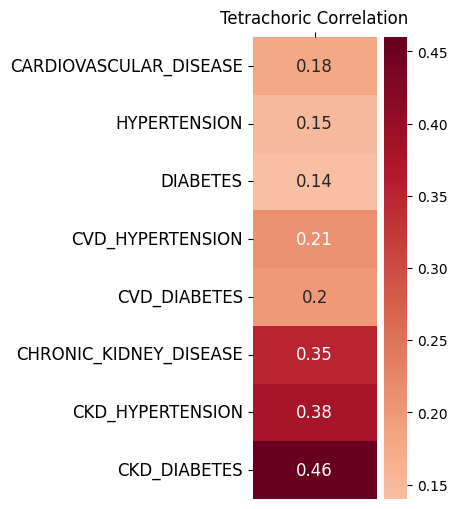

In [57]:
features = ['CARDIOVASCULAR_DISEASE', 'HYPERTENSION', 'DIABETES' , 'CVD_HYPERTENSION', 'CVD_DIABETES', 
            'CHRONIC_KIDNEY_DISEASE', 'CKD_HYPERTENSION', 'CKD_DIABETES']

# Create the result DataFrame
MED_UNIT_9_df = pd.DataFrame(columns=['Comorbidity', 'Tetrachoric Correlation'])

# Calculate the tetrachoric correlations and populate the DataFrame
for feature in features:
    tet_corr = tetrachoric_corr(MED_UNIT_9, feature)
    MED_UNIT_9_df = pd.concat([MED_UNIT_9_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])

# Create the heatmap
plt.figure(figsize=(2, 6))
ax = sns.heatmap(MED_UNIT_9_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [58]:

MED_UNIT_6['DIABETES_HYPERTENSION'] = (MED_UNIT_6['DIABETES'] == 1) & (MED_UNIT_6['HYPERTENSION'] == 1)
MED_UNIT_6['DIABETES_HYPERTENSION'] = MED_UNIT_6['DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_6['CVD_DIABETES_HYPERTENSION'] = (MED_UNIT_6['DIABETES'] == 1) & (MED_UNIT_6['HYPERTENSION'] == 1) & (MED_UNIT_6['CARDIOVASCULAR_DISEASE'] == 1)
MED_UNIT_6['CVD_DIABETES_HYPERTENSION'] = MED_UNIT_6['CVD_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_6['CVD_DIABETES'] = (MED_UNIT_6['DIABETES'] == 1) & (MED_UNIT_6['CARDIOVASCULAR_DISEASE'] == 1)
MED_UNIT_6['CVD_DIABETES'] = MED_UNIT_6['CVD_DIABETES'].astype(int)

MED_UNIT_6['CVD_HYPERTENSION'] = (MED_UNIT_6['CARDIOVASCULAR_DISEASE'] == 1) & (MED_UNIT_6['HYPERTENSION'] == 1)
MED_UNIT_6['CVD_HYPERTENSION'] = MED_UNIT_6['DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_6['OBESITY_DIABETES_HYPERTENSION'] = (MED_UNIT_6['OBESITY'] == 1) & (MED_UNIT_6['HYPERTENSION'] == 1) & (MED_UNIT_6['DIABETES'] == 1)
MED_UNIT_6['OBESITY_DIABETES_HYPERTENSION'] = MED_UNIT_6['OBESITY_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_6['CKD_DIABETES'] = (MED_UNIT_6['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_6['DIABETES'] == 1)
MED_UNIT_6['CKD_DIABETES'] = MED_UNIT_6['CKD_DIABETES'].astype(int)

MED_UNIT_6['CKD_HYPERTENSION'] = (MED_UNIT_6['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_6['HYPERTENSION'] == 1)
MED_UNIT_6['CKD_HYPERTENSION'] = MED_UNIT_6['CKD_HYPERTENSION'].astype(int)

MED_UNIT_6['CKD_DIABETES_HYPERTENSION'] = (MED_UNIT_6['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_6['DIABETES'] == 1) & (MED_UNIT_6['HYPERTENSION'] == 1)
MED_UNIT_6['CKD_DIABETES_HYPERTENSION'] = MED_UNIT_6['CKD_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_6

,COVID_TEST_RESULT,MEDICAL_UNIT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,PNEUMONIA,DEAD,AGE_GROUP,AGE,SEX,...,OBESITY,OTHER_DISEASE,DIABETES_HYPERTENSION,CVD_DIABETES_HYPERTENSION,CVD_DIABETES,CVD_HYPERTENSION,OBESITY_DIABETES_HYPERTENSION,CKD_DIABETES,CKD_HYPERTENSION,CKD_DIABETES_HYPERTENSION
50579,1,6,1,1.0,1.0,1.0,1,60+,83,female,...,0.0,NaN,1,1,1,1,0,0,0,0
50580,1,6,1,1.0,1.0,1.0,1,30-44,41,male,...,0.0,1.0,1,0,0,1,0,0,0,0
50581,1,6,0,NaN,NaN,1.0,1,45-60,58,male,...,0.0,0.0,0,0,0,0,0,0,0,0
50582,1,6,1,0.0,0.0,1.0,1,60+,82,female,...,1.0,0.0,0,0,0,0,0,0,0,0
50583,1,6,1,0.0,0.0,1.0,1,45-60,59,female,...,1.0,0.0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60577,1,6,1,0.0,0.0,0.0,0,60+,62,female,...,0.0,0.0,1,1,1,1,0,0,0,0
60578,1,6,0,NaN,NaN,0.0,0,30-44,32,female,...,1.0,0.0,0,0,0,0,0,0,0,0
60579,1,6,0,NaN,NaN,0.0,0,30-44,32,male,...,0.0,0.0,0,0,0,0,0,0,0,0
60580,1,6,0,NaN,NaN,0.0,0,60+,60,female,...,0.0,0.0,1,0,0,1,0,0,0,0


C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\1394317908.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MED_UNIT_6_df = pd.concat([MED_UNIT_6_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])


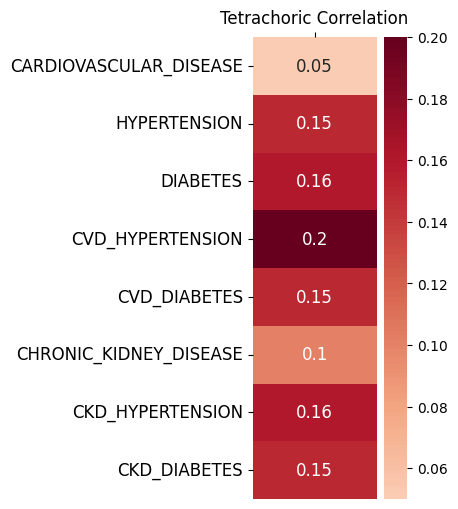

In [59]:
features = ['CARDIOVASCULAR_DISEASE', 'HYPERTENSION', 'DIABETES' , 'CVD_HYPERTENSION', 'CVD_DIABETES', 
            'CHRONIC_KIDNEY_DISEASE', 'CKD_HYPERTENSION', 'CKD_DIABETES']

# Create the result DataFrame
MED_UNIT_6_df = pd.DataFrame(columns=['Comorbidity', 'Tetrachoric Correlation'])

# Calculate the tetrachoric correlations and populate the DataFrame
for feature in features:
    tet_corr = tetrachoric_corr(MED_UNIT_6, feature)
    MED_UNIT_6_df = pd.concat([MED_UNIT_6_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])

# Create the heatmap
plt.figure(figsize=(2, 6))
ax = sns.heatmap(MED_UNIT_6_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [60]:

MED_UNIT_4['DIABETES_HYPERTENSION'] = (MED_UNIT_4['DIABETES'] == 1) & (MED_UNIT_4['HYPERTENSION'] == 1)
MED_UNIT_4['DIABETES_HYPERTENSION'] = MED_UNIT_4['DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_4['CVD_DIABETES_HYPERTENSION'] = (MED_UNIT_4['DIABETES'] == 1) & (MED_UNIT_4['HYPERTENSION'] == 1) & (MED_UNIT_4['CARDIOVASCULAR_DISEASE'] == 1)
MED_UNIT_4['CVD_DIABETES_HYPERTENSION'] = MED_UNIT_4['CVD_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_4['CVD_DIABETES'] = (MED_UNIT_4['DIABETES'] == 1) & (MED_UNIT_4['CARDIOVASCULAR_DISEASE'] == 1)
MED_UNIT_4['CVD_DIABETES'] = MED_UNIT_4['CVD_DIABETES'].astype(int)

MED_UNIT_4['CVD_HYPERTENSION'] = (MED_UNIT_4['CARDIOVASCULAR_DISEASE'] == 1) & (MED_UNIT_4['HYPERTENSION'] == 1)
MED_UNIT_4['CVD_HYPERTENSION'] = MED_UNIT_4['DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_4['OBESITY_DIABETES_HYPERTENSION'] = (MED_UNIT_4['OBESITY'] == 1) & (MED_UNIT_4['HYPERTENSION'] == 1) & (MED_UNIT_4['DIABETES'] == 1)
MED_UNIT_4['OBESITY_DIABETES_HYPERTENSION'] = MED_UNIT_4['OBESITY_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_4['CKD_DIABETES'] = (MED_UNIT_4['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_4['DIABETES'] == 1)
MED_UNIT_4['CKD_DIABETES'] = MED_UNIT_4['CKD_DIABETES'].astype(int)

MED_UNIT_4['CKD_HYPERTENSION'] = (MED_UNIT_4['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_4['HYPERTENSION'] == 1)
MED_UNIT_4['CKD_HYPERTENSION'] = MED_UNIT_4['CKD_HYPERTENSION'].astype(int)

MED_UNIT_4['CKD_DIABETES_HYPERTENSION'] = (MED_UNIT_4['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_4['DIABETES'] == 1) & (MED_UNIT_4['HYPERTENSION'] == 1)
MED_UNIT_4['CKD_DIABETES_HYPERTENSION'] = MED_UNIT_4['CKD_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_4

,COVID_TEST_RESULT,MEDICAL_UNIT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,PNEUMONIA,DEAD,AGE_GROUP,AGE,SEX,...,OBESITY,OTHER_DISEASE,DIABETES_HYPERTENSION,CVD_DIABETES_HYPERTENSION,CVD_DIABETES,CVD_HYPERTENSION,OBESITY_DIABETES_HYPERTENSION,CKD_DIABETES,CKD_HYPERTENSION,CKD_DIABETES_HYPERTENSION
4389,1,4,1,0.0,0.0,0.0,1,45-60,56,male,...,0.0,0.0,1,1,1,1,0,1,1,1
4390,1,4,1,1.0,0.0,1.0,1,60+,74,male,...,0.0,0.0,0,0,0,0,0,0,0,0
4391,1,4,1,0.0,0.0,1.0,1,45-60,56,male,...,1.0,0.0,0,0,0,0,0,1,0,0
4392,1,4,1,1.0,0.0,1.0,1,60+,78,male,...,0.0,0.0,1,0,0,1,0,1,1,1
4393,1,4,1,0.0,0.0,1.0,1,45-60,57,male,...,0.0,0.0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48716,1,4,1,1.0,0.0,0.0,0,60+,71,male,...,0.0,0.0,0,0,0,0,0,0,0,0
48717,1,4,1,0.0,0.0,1.0,0,30-44,31,female,...,0.0,1.0,0,0,0,0,0,0,0,0
48718,1,4,0,NaN,NaN,0.0,0,45-60,55,male,...,0.0,1.0,0,0,0,0,0,0,0,0
48719,1,4,1,0.0,0.0,0.0,0,60+,71,female,...,NaN,NaN,0,0,0,0,0,0,0,0


C:\Users\elzbi\AppData\Local\Temp\ipykernel_22620\2218200705.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MED_UNIT_4_df = pd.concat([MED_UNIT_4_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])


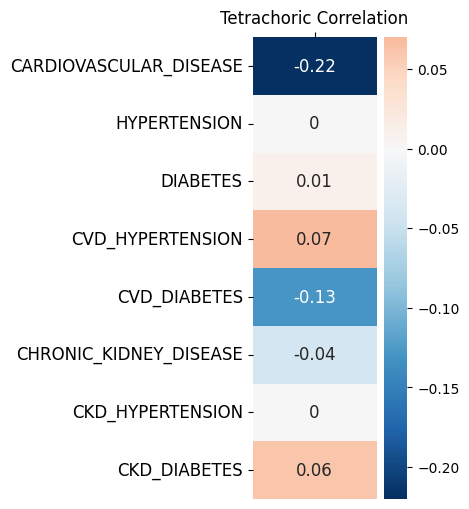

In [61]:
features = ['CARDIOVASCULAR_DISEASE', 'HYPERTENSION', 'DIABETES' , 'CVD_HYPERTENSION', 'CVD_DIABETES', 
            'CHRONIC_KIDNEY_DISEASE', 'CKD_HYPERTENSION', 'CKD_DIABETES']

# Create the result DataFrame
MED_UNIT_4_df = pd.DataFrame(columns=['Comorbidity', 'Tetrachoric Correlation'])

# Calculate the tetrachoric correlations and populate the DataFrame
for feature in features:
    tet_corr = tetrachoric_corr(MED_UNIT_4, feature)
    MED_UNIT_4_df = pd.concat([MED_UNIT_4_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])

# Create the heatmap
plt.figure(figsize=(2, 6))
ax = sns.heatmap(MED_UNIT_4_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()